In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display

import librosa

import librosa.display

import os
import tempfile

import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tensorboardX import SummaryWriter
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score

In [2]:



class FeatureExtractor:
    def extract_features(self, wav_path, frame_sec):
        """
        Extracts features for classification ny frames for .wav file

        :param wav_path: string, path to .wav file
        :return: pandas.DataFrame with features of shape (n_chunks, n_features)
        """
        y, sr = librosa.load(wav_path)
        
        S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)
        fbank = np.copy(log_S)
        mfc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
        delta_mfcc  = librosa.feature.delta(mfc)
        delta2_mfcc = librosa.feature.delta(mfc, order=2)
        res = np.concatenate((mfc, delta_mfcc, delta2_mfcc, fbank)).T
    
        return pd.DataFrame(res)
        

In [3]:
def prepare_data(path, frame_sec=1.0):
    fe = FeatureExtractor()
    data = list()
    
    clf = SSPNetDataSampler("")
    
    for i in range(1, 2764):
        name = path + "/S" + str(i).rjust(4, '0') + ".wav"
        print(name)
        ds = fe.extract_features(name, frame_sec)
        labels = list(clf.get_labels_for_file(name, 11.0/474)['IS_LAUGHTER'])
        num_elems = min(ds.shape[0], len(labels))
        ds = ds[:num_elems]
        labels = labels[:num_elems]
        data.append((ds, labels))
    return data

In [83]:
data_noisy = prepare_data("data_noisy")

data_noisy/S0001.wav
data_noisy/S0002.wav
data_noisy/S0003.wav
data_noisy/S0004.wav
data_noisy/S0005.wav
data_noisy/S0006.wav
data_noisy/S0007.wav
data_noisy/S0008.wav
data_noisy/S0009.wav
data_noisy/S0010.wav
data_noisy/S0011.wav
data_noisy/S0012.wav
data_noisy/S0013.wav
data_noisy/S0014.wav
data_noisy/S0015.wav
data_noisy/S0016.wav
data_noisy/S0017.wav
data_noisy/S0018.wav
data_noisy/S0019.wav
data_noisy/S0020.wav
data_noisy/S0021.wav
data_noisy/S0022.wav
data_noisy/S0023.wav
data_noisy/S0024.wav
data_noisy/S0025.wav
data_noisy/S0026.wav
data_noisy/S0027.wav
data_noisy/S0028.wav
data_noisy/S0029.wav
data_noisy/S0030.wav
data_noisy/S0031.wav
data_noisy/S0032.wav
data_noisy/S0033.wav
data_noisy/S0034.wav
data_noisy/S0035.wav
data_noisy/S0036.wav
data_noisy/S0037.wav
data_noisy/S0038.wav
data_noisy/S0039.wav
data_noisy/S0040.wav
data_noisy/S0041.wav
data_noisy/S0042.wav
data_noisy/S0043.wav
data_noisy/S0044.wav
data_noisy/S0045.wav
data_noisy/S0046.wav
data_noisy/S0047.wav
data_noisy/S0

data_noisy/S0392.wav
data_noisy/S0393.wav
data_noisy/S0394.wav
data_noisy/S0395.wav
data_noisy/S0396.wav
data_noisy/S0397.wav
data_noisy/S0398.wav
data_noisy/S0399.wav
data_noisy/S0400.wav
data_noisy/S0401.wav
data_noisy/S0402.wav
data_noisy/S0403.wav
data_noisy/S0404.wav
data_noisy/S0405.wav
data_noisy/S0406.wav
data_noisy/S0407.wav
data_noisy/S0408.wav
data_noisy/S0409.wav
data_noisy/S0410.wav
data_noisy/S0411.wav
data_noisy/S0412.wav
data_noisy/S0413.wav
data_noisy/S0414.wav
data_noisy/S0415.wav
data_noisy/S0416.wav
data_noisy/S0417.wav
data_noisy/S0418.wav
data_noisy/S0419.wav
data_noisy/S0420.wav
data_noisy/S0421.wav
data_noisy/S0422.wav
data_noisy/S0423.wav
data_noisy/S0424.wav
data_noisy/S0425.wav
data_noisy/S0426.wav
data_noisy/S0427.wav
data_noisy/S0428.wav
data_noisy/S0429.wav
data_noisy/S0430.wav
data_noisy/S0431.wav
data_noisy/S0432.wav
data_noisy/S0433.wav
data_noisy/S0434.wav
data_noisy/S0435.wav
data_noisy/S0436.wav
data_noisy/S0437.wav
data_noisy/S0438.wav
data_noisy/S0

data_noisy/S0783.wav
data_noisy/S0784.wav
data_noisy/S0785.wav
data_noisy/S0786.wav
data_noisy/S0787.wav
data_noisy/S0788.wav
data_noisy/S0789.wav
data_noisy/S0790.wav
data_noisy/S0791.wav
data_noisy/S0792.wav
data_noisy/S0793.wav
data_noisy/S0794.wav
data_noisy/S0795.wav
data_noisy/S0796.wav
data_noisy/S0797.wav
data_noisy/S0798.wav
data_noisy/S0799.wav
data_noisy/S0800.wav
data_noisy/S0801.wav
data_noisy/S0802.wav
data_noisy/S0803.wav
data_noisy/S0804.wav
data_noisy/S0805.wav
data_noisy/S0806.wav
data_noisy/S0807.wav
data_noisy/S0808.wav
data_noisy/S0809.wav
data_noisy/S0810.wav
data_noisy/S0811.wav
data_noisy/S0812.wav
data_noisy/S0813.wav
data_noisy/S0814.wav
data_noisy/S0815.wav
data_noisy/S0816.wav
data_noisy/S0817.wav
data_noisy/S0818.wav
data_noisy/S0819.wav
data_noisy/S0820.wav
data_noisy/S0821.wav
data_noisy/S0822.wav
data_noisy/S0823.wav
data_noisy/S0824.wav
data_noisy/S0825.wav
data_noisy/S0826.wav
data_noisy/S0827.wav
data_noisy/S0828.wav
data_noisy/S0829.wav
data_noisy/S0

data_noisy/S1174.wav
data_noisy/S1175.wav
data_noisy/S1176.wav
data_noisy/S1177.wav
data_noisy/S1178.wav
data_noisy/S1179.wav
data_noisy/S1180.wav
data_noisy/S1181.wav
data_noisy/S1182.wav
data_noisy/S1183.wav
data_noisy/S1184.wav
data_noisy/S1185.wav
data_noisy/S1186.wav
data_noisy/S1187.wav
data_noisy/S1188.wav
data_noisy/S1189.wav
data_noisy/S1190.wav
data_noisy/S1191.wav
data_noisy/S1192.wav
data_noisy/S1193.wav
data_noisy/S1194.wav
data_noisy/S1195.wav
data_noisy/S1196.wav
data_noisy/S1197.wav
data_noisy/S1198.wav
data_noisy/S1199.wav
data_noisy/S1200.wav
data_noisy/S1201.wav
data_noisy/S1202.wav
data_noisy/S1203.wav
data_noisy/S1204.wav
data_noisy/S1205.wav
data_noisy/S1206.wav
data_noisy/S1207.wav
data_noisy/S1208.wav
data_noisy/S1209.wav
data_noisy/S1210.wav
data_noisy/S1211.wav
data_noisy/S1212.wav
data_noisy/S1213.wav
data_noisy/S1214.wav
data_noisy/S1215.wav
data_noisy/S1216.wav
data_noisy/S1217.wav
data_noisy/S1218.wav
data_noisy/S1219.wav
data_noisy/S1220.wav
data_noisy/S1

data_noisy/S1565.wav
data_noisy/S1566.wav
data_noisy/S1567.wav
data_noisy/S1568.wav
data_noisy/S1569.wav
data_noisy/S1570.wav
data_noisy/S1571.wav
data_noisy/S1572.wav
data_noisy/S1573.wav
data_noisy/S1574.wav
data_noisy/S1575.wav
data_noisy/S1576.wav
data_noisy/S1577.wav
data_noisy/S1578.wav
data_noisy/S1579.wav
data_noisy/S1580.wav
data_noisy/S1581.wav
data_noisy/S1582.wav
data_noisy/S1583.wav
data_noisy/S1584.wav
data_noisy/S1585.wav
data_noisy/S1586.wav
data_noisy/S1587.wav
data_noisy/S1588.wav
data_noisy/S1589.wav
data_noisy/S1590.wav
data_noisy/S1591.wav
data_noisy/S1592.wav
data_noisy/S1593.wav
data_noisy/S1594.wav
data_noisy/S1595.wav
data_noisy/S1596.wav
data_noisy/S1597.wav
data_noisy/S1598.wav
data_noisy/S1599.wav
data_noisy/S1600.wav
data_noisy/S1601.wav
data_noisy/S1602.wav
data_noisy/S1603.wav
data_noisy/S1604.wav
data_noisy/S1605.wav
data_noisy/S1606.wav
data_noisy/S1607.wav
data_noisy/S1608.wav
data_noisy/S1609.wav
data_noisy/S1610.wav
data_noisy/S1611.wav
data_noisy/S1

data_noisy/S1956.wav
data_noisy/S1957.wav
data_noisy/S1958.wav
data_noisy/S1959.wav
data_noisy/S1960.wav
data_noisy/S1961.wav
data_noisy/S1962.wav
data_noisy/S1963.wav
data_noisy/S1964.wav
data_noisy/S1965.wav
data_noisy/S1966.wav
data_noisy/S1967.wav
data_noisy/S1968.wav
data_noisy/S1969.wav
data_noisy/S1970.wav
data_noisy/S1971.wav
data_noisy/S1972.wav
data_noisy/S1973.wav
data_noisy/S1974.wav
data_noisy/S1975.wav
data_noisy/S1976.wav
data_noisy/S1977.wav
data_noisy/S1978.wav
data_noisy/S1979.wav
data_noisy/S1980.wav
data_noisy/S1981.wav
data_noisy/S1982.wav
data_noisy/S1983.wav
data_noisy/S1984.wav
data_noisy/S1985.wav
data_noisy/S1986.wav
data_noisy/S1987.wav
data_noisy/S1988.wav
data_noisy/S1989.wav
data_noisy/S1990.wav
data_noisy/S1991.wav
data_noisy/S1992.wav
data_noisy/S1993.wav
data_noisy/S1994.wav
data_noisy/S1995.wav
data_noisy/S1996.wav
data_noisy/S1997.wav
data_noisy/S1998.wav
data_noisy/S1999.wav
data_noisy/S2000.wav
data_noisy/S2001.wav
data_noisy/S2002.wav
data_noisy/S2

data_noisy/S2347.wav
data_noisy/S2348.wav
data_noisy/S2349.wav
data_noisy/S2350.wav
data_noisy/S2351.wav
data_noisy/S2352.wav
data_noisy/S2353.wav
data_noisy/S2354.wav
data_noisy/S2355.wav
data_noisy/S2356.wav
data_noisy/S2357.wav
data_noisy/S2358.wav
data_noisy/S2359.wav
data_noisy/S2360.wav
data_noisy/S2361.wav
data_noisy/S2362.wav
data_noisy/S2363.wav
data_noisy/S2364.wav
data_noisy/S2365.wav
data_noisy/S2366.wav
data_noisy/S2367.wav
data_noisy/S2368.wav
data_noisy/S2369.wav
data_noisy/S2370.wav
data_noisy/S2371.wav
data_noisy/S2372.wav
data_noisy/S2373.wav
data_noisy/S2374.wav
data_noisy/S2375.wav
data_noisy/S2376.wav
data_noisy/S2377.wav
data_noisy/S2378.wav
data_noisy/S2379.wav
data_noisy/S2380.wav
data_noisy/S2381.wav
data_noisy/S2382.wav
data_noisy/S2383.wav
data_noisy/S2384.wav
data_noisy/S2385.wav
data_noisy/S2386.wav
data_noisy/S2387.wav
data_noisy/S2388.wav
data_noisy/S2389.wav
data_noisy/S2390.wav
data_noisy/S2391.wav
data_noisy/S2392.wav
data_noisy/S2393.wav
data_noisy/S2

data_noisy/S2738.wav
data_noisy/S2739.wav
data_noisy/S2740.wav
data_noisy/S2741.wav
data_noisy/S2742.wav
data_noisy/S2743.wav
data_noisy/S2744.wav
data_noisy/S2745.wav
data_noisy/S2746.wav
data_noisy/S2747.wav
data_noisy/S2748.wav
data_noisy/S2749.wav
data_noisy/S2750.wav
data_noisy/S2751.wav
data_noisy/S2752.wav
data_noisy/S2753.wav
data_noisy/S2754.wav
data_noisy/S2755.wav
data_noisy/S2756.wav
data_noisy/S2757.wav
data_noisy/S2758.wav
data_noisy/S2759.wav
data_noisy/S2760.wav
data_noisy/S2761.wav
data_noisy/S2762.wav
data_noisy/S2763.wav


In [86]:
def write_data(data, file_name, features_num=474):
    for x, y in data_noisy:
        if len(x) == features_num:
            df = pd.DataFrame.copy(x)
            dff = pd.DataFrame({"167" : y})
            df = df.join(dff)
            df.to_csv(file_name, mode='a', header=False, index=False)

In [87]:
write_data(data, "super_mega_file_474_expanded_noisy.csv")

In [4]:
features_count = 128 + 13 + 13 + 13
col_names = ["{}".format(i) for i in range(features_count)]
col_names.append("IS_LAUGHTER")
dff = pd.read_csv("super_mega_file_474_expanded.csv", sep="," , names=col_names)
data = np.array(dff).reshape(2735, 474, 168)
train_x = data[:2000,:,:167]
train_y = data[:2000,:,167]
test_x = data[2000:,:,:167]
test_y = data[2000:,:,167]

In [2]:
features_count = 128 + 13 + 13 + 13
col_names = ["{}".format(i) for i in range(features_count)]
col_names.append("IS_LAUGHTER")
dff_noisy = pd.read_csv("super_mega_file_474_expanded_noisy.csv", sep="," , names=col_names)
data_noisy = np.array(dff_noisy).reshape(2735, 474, 168)
train_x_noisy = data_noisy[:2000,:,:167]
train_y_noisy = data_noisy[:2000,:,167]
test_x_noisy = data_noisy[2000:,:,:167]
test_y_noisy = data_noisy[2000:,:,167]

In [3]:
class LSTMTagger(nn.Module):

    def __init__(self, features_num, hidden_dim, target_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm_fst = nn.LSTM(features_num - 39, hidden_dim, num_layers=2)
        self.lstm_snd = nn.LSTM(39, hidden_dim//2, num_layers=2)
        
        self.hidden2tag_fst = nn.Linear(hidden_dim*3//2, hidden_dim*3//2)
        self.hidden2tag_snd = nn.Linear(hidden_dim//2, hidden_dim//2)
        
        self.linear_fst_one = nn.Linear(hidden_dim*3//2, hidden_dim*3//2)
        self.linear_fst_two = nn.Linear(hidden_dim*3//2, 1)
        
        self.linear_snd_one = nn.Linear(hidden_dim//2, 1)
        
        self.hidden_fst = self.init_hidden()
        self.hidden_snd = self.init_hidden()

    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_dim),
                torch.zeros(1, 1, self.hidden_dim))

    def forward(self, input_data):
        lstm_out_fst, _ = self.lstm_fst(
            input_data[:,:,39:])
        lstm_out_snd, _ = self.lstm_snd(
            input_data[:, :, :39])
        
        out_one_fst = nn.Dropout(0.3)(F.relu(self.hidden2tag_fst(torch.cat((lstm_out_fst, lstm_out_snd), 2))))
        out_two_fst = nn.Dropout(0.3)(F.relu(self.linear_fst_one(out_one_fst)))
        tag_space_fst = self.linear_fst_two(out_two_fst)
        tag_scores_fst = torch.nn.Sigmoid()(tag_space_fst)
        
        
        out_one_snd = F.relu(self.hidden2tag_snd(lstm_out_snd))
        tag_space_snd = self.linear_snd_one(out_one_snd)
        tag_scores_snd = torch.nn.Sigmoid()(tag_space_snd)
        
        return tag_scores_fst, tag_scores_snd

In [27]:
dl = DataLoader(torch.tensor(np.array(train_x)), batch_size=64)

In [ ]:
dl_noisy = DataLoader(torch.tensor(train_x_noisy), batch_size=64)

In [ ]:
writer = SummaryWriter(log_dir=os.path.join('save_root', 'loss'))

In [43]:
def train(model, epoch_num, learning_rate, batch_size, dl, train_y, logging=False, writer=None):
    loss_function = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate)

    step = 1


    for epoch in range(epoch_num):
        for i, X in enumerate(dl):
            y = train_y[batch_size*i: batch_size*(i + 1)]

            model.zero_grad()


            inp = torch.FloatTensor(np.array(X))

            fst, snd = model(inp)

            loss1 = loss_function(fst, torch.FloatTensor(y).reshape(-1, 474, 1))
            loss2 = loss_function(snd, torch.FloatTensor(y).reshape(-1, 474, 1))

            loss = loss1 + loss2
            if logging:
                writer.add_scalar('loss_train/mfcc_loss', loss1, step)
                writer.add_scalar('loss_train/general_loss', loss, step)

            loss.backward()
            optimizer.step()
            step += 1
        print(epoch)

In [ ]:
model = LSTMTagger(167, 256, 474)

In [44]:
train(model, 5, 0.000005, 64, dl, train_y_noisy)

0
1
2
3
4


In [8]:
fst_rs, snd_rs = model(torch.FloatTensor(test_x))
y_corr = test_y

In [9]:
y_res = fst_rs
print("AUC = {}".format(roc_auc_score(np.array(y_corr).reshape(np.array(y_corr).shape[0]*474), np.array(y_res.detach().numpy()).reshape(np.array(y_res.detach().numpy()).shape[0]*474))))

AUC = 0.8667527641878416


In [5]:
fst_rs_noisy, snd_rs_noisy = model(torch.FloatTensor(test_x_noisy))
y_corr_noisy = test_y_noisy

In [6]:
y_res_noisy = fst_rs_noisy
print("AUC = {}".format(roc_auc_score(np.array(y_corr_noisy).reshape(np.array(y_corr_noisy).shape[0]*474), np.array(y_res_noisy.detach().numpy()).reshape(np.array(y_res_noisy.detach().numpy()).shape[0]*474))))

AUC = 0.8669574434113473


In [85]:
np.sum(np.round(fst_rs.detach().numpy())*y_corr.reshape(-1,474,1))

2732.0

In [8]:
np.sum(np.round(fst_rs_noisy.detach().numpy())*y_corr_noisy.reshape(-1,474,1))

2758.0

In [69]:
torch.save({
    'epoch': 35,
    'state_dict': model.state_dict(),
    'optimizer' : optimizer.state_dict()
}, 'checkpoint_LSTMx2.pth.tar')

In [9]:
def plot(sample_num, y_res, y_corr):
    plt.figure(figsize=(13, 13))
    x = np.linspace(0, 11, y_res.shape[1])
    plt.plot(x, y_res[sample_num], linewidth=2)
    plt.plot(x, y_corr[sample_num], "o--")
    plt.plot(x, np.linspace(0.5, 0.5, y_res.shape[1]), "g:")
    plt.show()

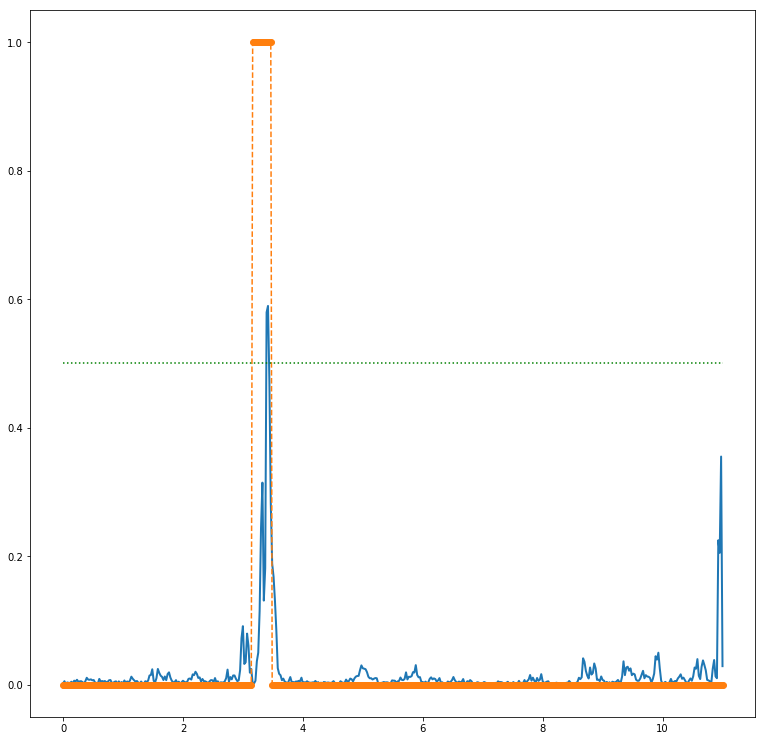

In [81]:
plot(28, y_res.detach().numpy(), y_corr)

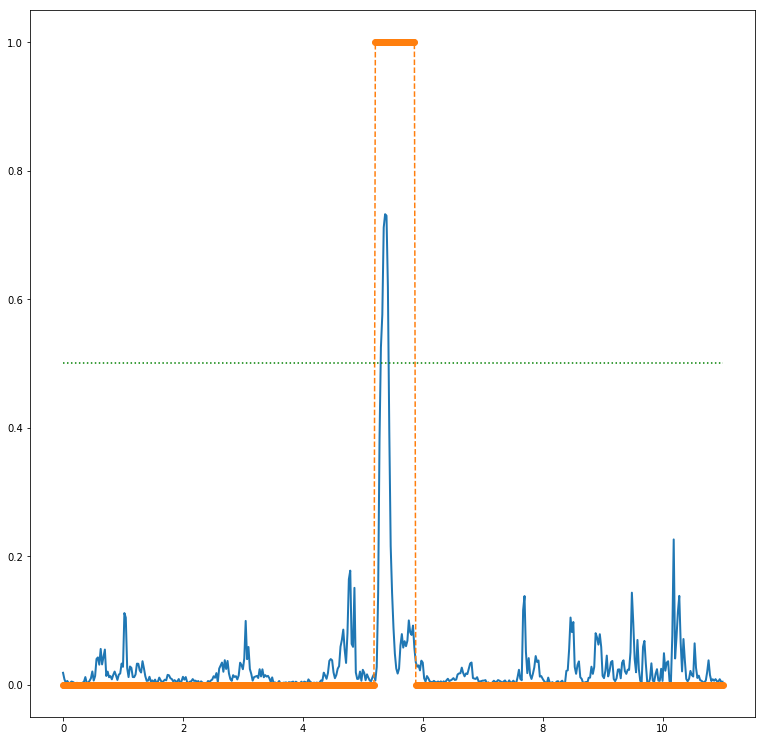

In [82]:
plot(32, y_res.detach().numpy(), y_corr)

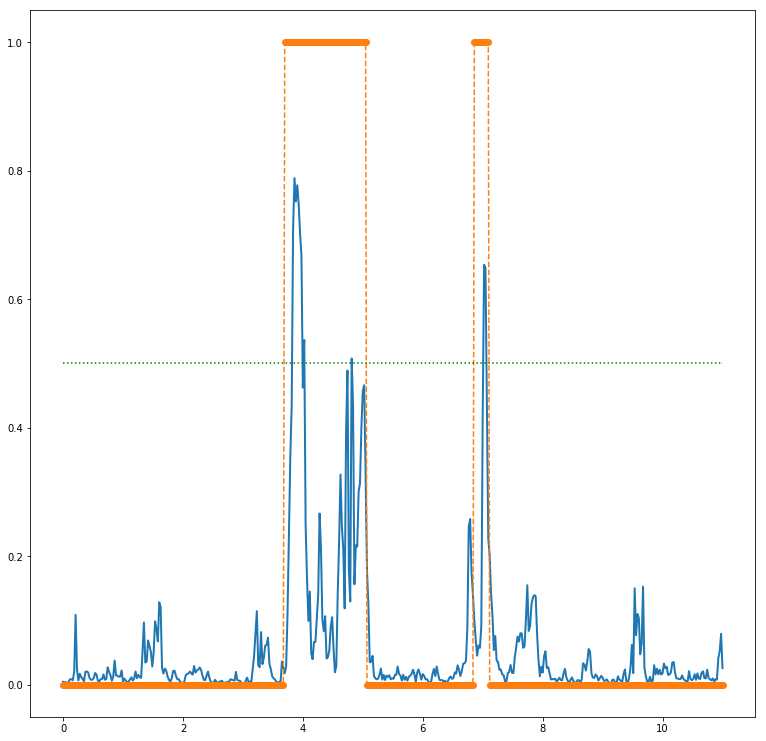

In [83]:
plot(33, y_res.detach().numpy(), y_corr)

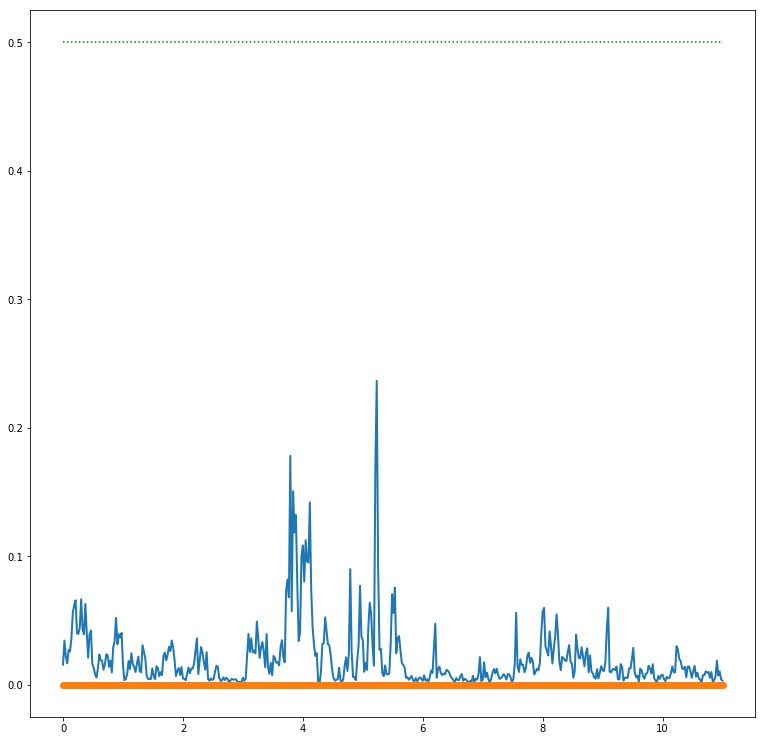

In [84]:
plot(35, y_res.detach().numpy(), y_corr)

In [77]:
##Plots on data with noise

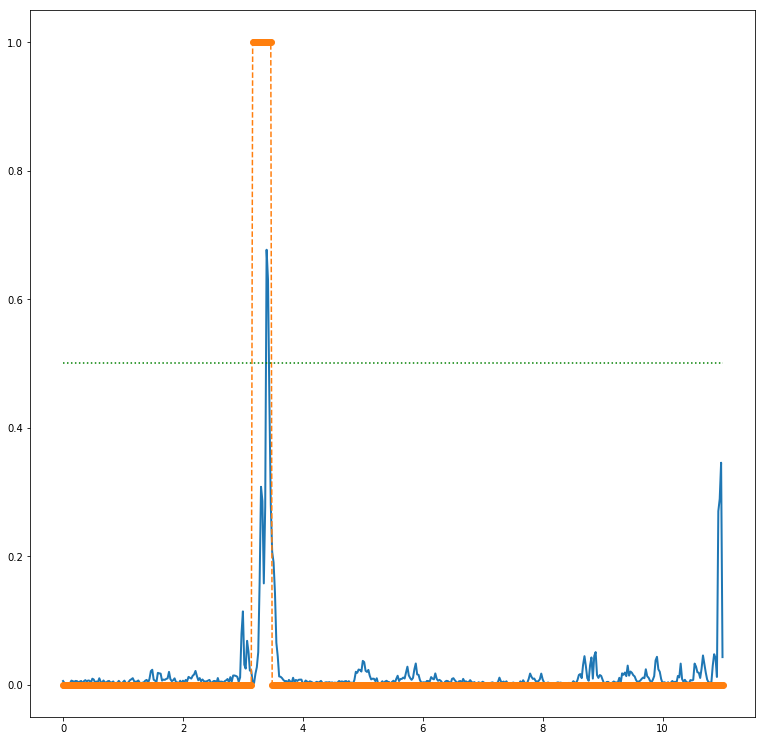

In [10]:
plot(28, y_res_noisy.detach().numpy(), y_corr_noisy)

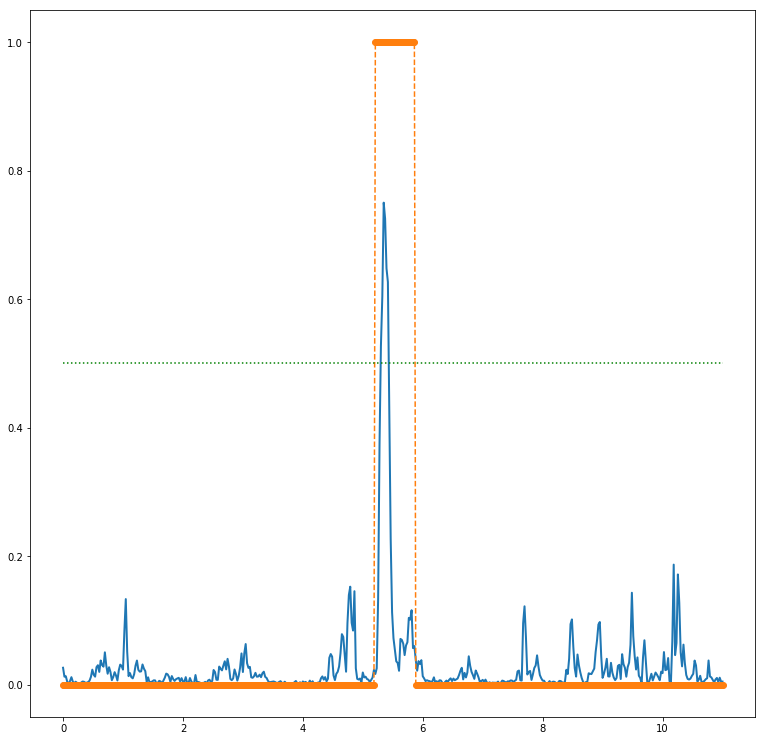

In [11]:
plot(32, y_res_noisy.detach().numpy(), y_corr_noisy)

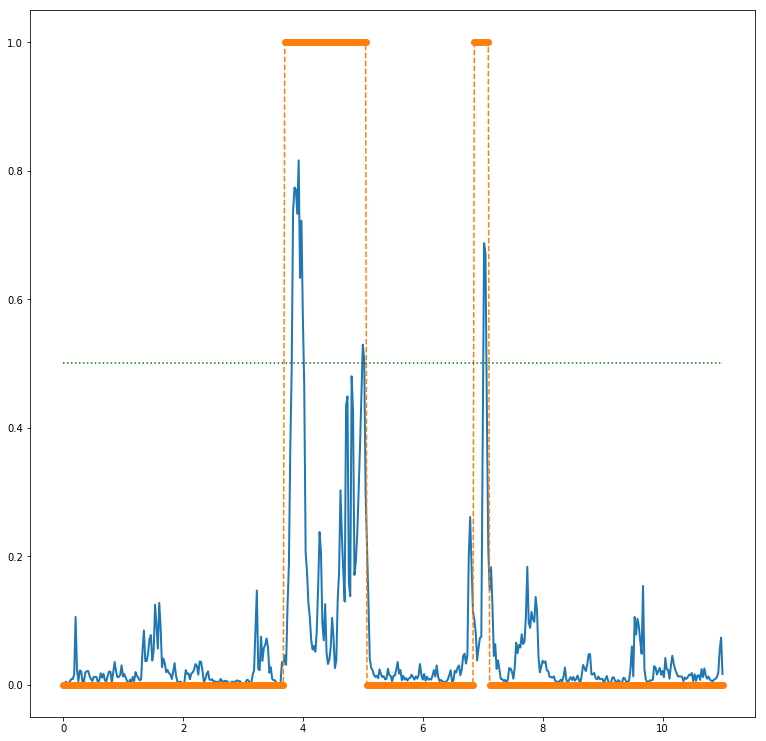

In [12]:
plot(33, y_res_noisy.detach().numpy(), y_corr_noisy)

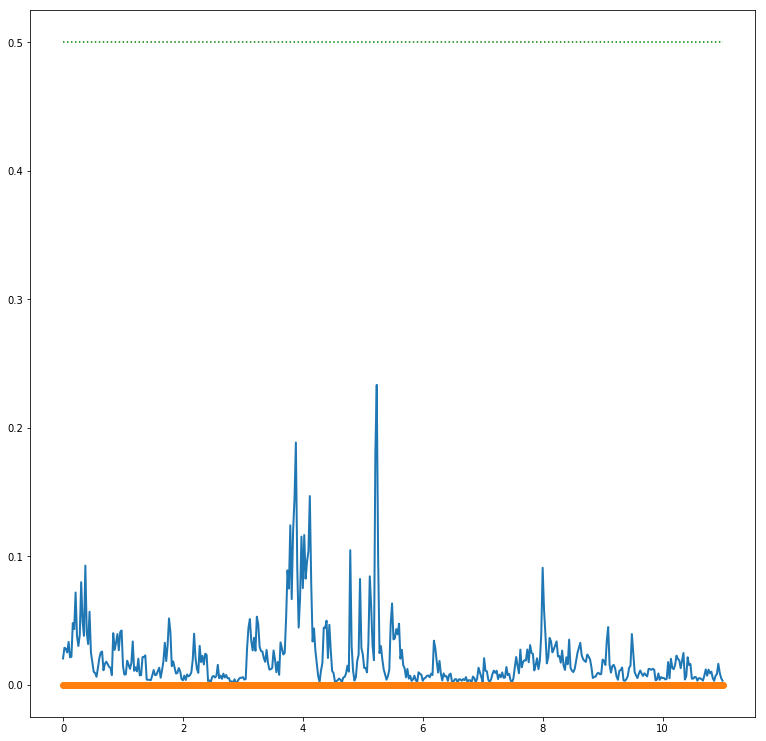

In [13]:
plot(35, y_res_noisy.detach().numpy(), y_corr_noisy)

In [50]:
#batch=8, 64 + 2*lin + 0.00005lrn: fst=0.78, snd=0.67
#batch=8, 32 + 2*lin + 0.00005lrn: fst=0.71, snd=0.448
#batch=8, 32 + 2*lin + cat + 0.00005lrn: fst=0.722, snd=0.608
#batch=8, 64 + [3/2]*lin + cat + 0.00005lrn: fst=0.782, snd=0.66
#batch=8, 64 + [3/2]*lin + cat + 0.00002lrn: fst=0.79, snd=0.53
#batch=8, 64 + split mfcc/fbank + [3/2]*lin + cat + 0.00001lrn: fst=0.78, snd=0.36
#batch=1, 64 + split mfcc/fbank + [3/2]*lin + cat + 0.00001lrn: fst=0.757, snd=0.55
#batch=1, 64 + split mfcc/fbank + [3/2]*lin + dropout(0.7) + cat + 0.000005lrn: fst=0.64, snd=0.55
#batch=1, 128 + split mfcc/fbank + [3/2]*lin + dropout(0.7) + cat + 0.000002lrn: fst=0.65, snd=0.34
#batch=1, 128 + split mfcc/fbank + [3/2]*lin + dropout(0.3) + cat + 0.000002lrn: fst=0.72, snd=0.53
#batch=8, 128 + split mfcc/fbank + [3/2]*lin + dropout(0.3) + cat + 0.000002lrn: fst=0.5, snd=0.37
#batch=8, 128 + split mfcc/fbank + [3/2]*lin + dropout(0.3) + cat + 0.00005lrn: fst=0.78, snd=0.79

#76 77
#78 71
#39/13 mfcc + 128 0.81 0.766
#128/39 mfcc + 128 0.822 0.825

In [4]:
model = LSTMTagger(167, 256, 474)
optimizer = optim.Adam(model.parameters(), lr = 0.00005)
checkpoint = torch.load('checkpoint_LSTMx2.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [82]:
import os
from os.path import join

import numpy as np
import pandas as pd
import scipy.io.wavfile as wav

from homework.laughter_classification.utils import chunks, in_any, interv_to_range, get_sname

from homework.laughter_prediction.sample_audio import sample_wav_by_time


class SSPNetDataSampler:
    """
    Class for loading and sampling audio data by frames for SSPNet Vocalization Corpus
    """

    @staticmethod
    def read_labels(labels_path):
        def_cols = ['Sample', 'original_spk', 'gender', 'original_time']
        label_cols = ["{}_{}".format(name, ind) for ind in range(6) for name in ('type_voc', 'start_voc', 'end_voc')]
        def_cols.extend(label_cols)
        labels = pd.read_csv(labels_path, names=def_cols, engine='python', skiprows=1)
        return labels

    def __init__(self, corpus_root):
        self.sample_rate = 16000
        self.duration = 11
        self.default_len = self.sample_rate * self.duration
        self.data_dir = join(corpus_root, "data")
        labels_path = join(corpus_root, "labels.txt")
        self.labels = self.read_labels(labels_path)

    @staticmethod
    def most(l):
        return int(sum(l) > len(l) / 2)

    @staticmethod
    def _interval_generator(incidents):
        for itype, start, end in chunks(incidents, 3):
            if itype == 'laughter':
                yield start, end

    def get_labels_for_file(self, wav_path, frame_sec):
        sname = get_sname(wav_path)
        sample = self.labels[self.labels.Sample == sname]

        incidents = sample.loc[:, 'type_voc_0':'end_voc_5']
        incidents = incidents.dropna(axis=1, how='all')
        incidents = incidents.values[0]

        rate, audio = wav.read(wav_path)

        laughts = self._interval_generator(incidents)
        laughts = [interv_to_range(x, len(audio), self.duration) for x in laughts]
        laught_along = [1 if in_any(t, laughts) else 0 for t, _ in enumerate(audio)]

        frame_size = int(self.sample_rate * frame_sec)
        is_laughter = np.array([self.most(la) for la in chunks(laught_along, frame_size)])

        df = pd.DataFrame({'IS_LAUGHTER': is_laughter,
                           'SNAME': sname})
        return df

    def df_from_file(self, wav_path, frame_sec):
        """
        Returns sampled data by path to audio file
        :param wav_path: string, .wav file path
        :param frame_sec: int, length of each frame in sec
        :return: pandas.DataFrame with sampled audio
        """
        data = sample_wav_by_time(wav_path, frame_sec)
        labels = self.get_labels_for_file(wav_path, frame_sec)
        df = pd.concat([data, labels], axis=1)
        return df

    def get_valid_wav_paths(self):
        for dirpath, dirnames, filenames in os.walk(self.data_dir):
            fullpaths = [join(dirpath, fn) for fn in filenames]
            return [path for path in fullpaths if len(wav.read(path)[1]) == self.default_len]

    def create_sampled_df(self, frame_sec, naudio=None, save_path=None, force_save=False):
        """
        Returns sampled data for whole corpus
        :param frame_sec: int, length of each frame in sec
        :param naudio: int, number of audios to parse, if not defined parses all
        :param save_path: string, path to save parsed corpus
        :param force_save: boolean, if you want to override file with same name
        :return:
        """
        fullpaths = self.get_valid_wav_paths()[:naudio]
        dataframes = [self.df_from_file(wav_path, frame_sec) for wav_path in fullpaths]
        df = pd.concat(dataframes)

        colnames = ["V{}".format(i) for i in range(df.shape[1] - 2)]
        colnames.append("IS_LAUGHTER")
        colnames.append("SNAME")
        df.columns = colnames

        if save_path is not None:
            if not os.path.isfile(save_path) or force_save:
                print("saving df: ", save_path)
                df.to_csv(save_path, index=False)

        return df